# INTRO : **TRANS JAKARTA**

---
## Background
TransJakarta is a transportation company. In the upcoming period, the company has a desire to expand its business into the advertising field. Broadly speaking, this advertising business is intended for brands that want to advertise their products on TransJakarta-operated vehicles. It is known that TransJakarta has various types of vehicles and, especially, varying passenger density levels. Therefore, pricing determination is expected to be divided into classes based on specific criteria. **Hence, TransJakarta requires insights to classify their vehicles for pricing determination in advertising spaces on the vehicles, based on the data they possess**.

---
## Problem Statement
TransJakarta aims to classify their vehicles for pricing determination in advertising spaces on the vehicles based on the data they possess. Consequently, the following questions arise:

1. What is the relationship between the data variables in determining passenger numbers?
2. How is the proportion and quantity of different vehicle types based on available routes?
3. How can the class division be achieved based on data variables?

---
## Stakeholder
Business Development TransJakarta Team

---
- Domain Knowledge:
    - **Raw data**
        - **tahun**: year of the data is collected.
        - **bulan**: month of the data is collected.
        - **jenis**: type of vehicle.
        - **kode_trayek**: route code.
        - **trayek**: route.
        - **jumlah_penumpang**: the number of passengers.
     - **After data manipulation**
        - **Date**: year and month of the data is collected.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data peserta yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists?taskId=3015).

## IMPORT DATA

In [51]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objects as go

df = pd.read_csv('TransJakartaPassengers2021Cleansed.csv')
display()

display(df.info(), df.describe(), df.describe(exclude='number'))

print('\n\nHead and tail of data: ')
display(df.head(),df.tail())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   date              1350 non-null   object
 1   jenis             1350 non-null   object
 2   kode_trayek       1350 non-null   object
 3   trayek            1350 non-null   object
 4   jumlah_penumpang  1350 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 52.9+ KB


None

,jumlah_penumpang
count,1.350000e+03
mean,8.080558e+04
std,1.232837e+05
min,1.000000e+00
25%,2.577725e+04
50%,4.901750e+04
75%,7.366325e+04
max,1.073929e+06


,date,jenis,kode_trayek,trayek
count,1350,1350,1350,1350
unique,11,3,131,131
top,2021-11-01,mikrotrans,10K,Tanjung Priok - Senen Via Taman Bmw
freq,128,776,11,11




Head and tail of data: 


,date,jenis,kode_trayek,trayek,jumlah_penumpang
0,2021-01-01,angkutan umum integrasi,10K,Tanjung Priok - Senen Via Taman Bmw,41881
1,2021-01-01,angkutan umum integrasi,11D,Pulo Gebang - Pulo Gadung 2 Via Pik,61434
2,2021-01-01,angkutan umum integrasi,11Q,Kampung Melayu - Pulo Gebang Via Bkt,9436
3,2021-01-01,angkutan umum integrasi,12B,Pluit - Senen,9506
4,2021-01-01,angkutan umum integrasi,1A,Pantai Maju - Balai Kota,62721


,date,jenis,kode_trayek,trayek,jumlah_penumpang
1345,2021-11-01,mikrotrans,JAK.77,Tanjung Priok - Jembatan Item,75248
1346,2021-11-01,mikrotrans,JAK.80,Rawa Buaya - Rawa Kompeni,66701
1347,2021-11-01,mikrotrans,JAK.84,Terminal Kampung Melayu - Kapin Raya,49142
1348,2021-11-01,mikrotrans,JAK.85,Bintara - Cipinang Indah,38487
1349,2021-11-01,mikrotrans,JAK.88,Terminal Tanjung Priok - Ancol Barat,40135


## DEFINE FUNCTION

In [52]:
def normalCheckShapiro(data):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed.")
    else:
        print("The data is not normally distributed.")


def fillCentralTendencies(data, field):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed. Mean has selected to fill the value")
        df.loc[(df['kode_trayek'] == (field))&(df['jumlah_penumpang']==0), 'jumlah_penumpang'] = int(df[(df['kode_trayek'] == (field)) & (df['jumlah_penumpang'] != 0)]['jumlah_penumpang'].mean())
    else:
        print("The data is not normally distributed. Median has selected to fill the value")
        df.loc[(df['kode_trayek'] == (field))&(df['jumlah_penumpang']==0), 'jumlah_penumpang'] = int(df[(df['kode_trayek'] == (field)) & (df['jumlah_penumpang'] != 0)]['jumlah_penumpang'].median())

def centralTendencies(data, field):

    _, p_value = stats.shapiro(data)

    alpha = 0.05
    if p_value > alpha:
        print("The data is normally distributed. Mean has selected to fill the value")
        df.loc[(df['kode_trayek'] == (field))&(df['jumlah_penumpang']==0), 'jumlah_penumpang'] = int(df[(df['kode_trayek'] == (field)) & (df['jumlah_penumpang'] != 0)]['jumlah_penumpang'].mean())
    else:
        print("The data is not normally distributed. Median has selected to fill the value")
        df.loc[(df['kode_trayek'] == (field))&(df['jumlah_penumpang']==0), 'jumlah_penumpang'] = int(df[(df['kode_trayek'] == (field)) & (df['jumlah_penumpang'] != 0)]['jumlah_penumpang'].median())

def outliersDetail(dataframe,field,detail=''):
    q1 = dataframe[field].describe()['25%']
    q3 = dataframe[field].describe()['75%']
    IQR = q3 - q1
    lowerBound = q1 - (1.5*IQR)
    upperBound = q3 + (1.5*IQR)

    print(f'Jumlah data\t= {len(dataframe)}')
    print(f'lower bound\t= {lowerBound}\nupper bound\t= {upperBound}')
    print(f'Jumlah data outliers\t= {len(dataframe[dataframe[field]<lowerBound]) + len(dataframe[dataframe[field]>upperBound])}')

    dfExcludeOutliers = dataframe[dataframe[field].between(lowerBound,upperBound)]
    print(f'Jumlah data (exclude outliers)\t= {len(dfExcludeOutliers)}')

    plt.figure()
    sns.boxplot(dataframe[field].reset_index(drop=True), orient='h')
    plt.title(f'Pesebaran Data {field} {detail}')
    plt.show()

    plt.figure()
    sns.boxplot(dfExcludeOutliers[field].reset_index(drop=True), orient='h')
    plt.title(f'Pesebaran Data {field} {detail} (Outliers excluded)')
    plt.show()


# DATA ANALYSIS

## 1. Bagaimana keterkaitan antar varible data dalam membangun jumlah penumpang?

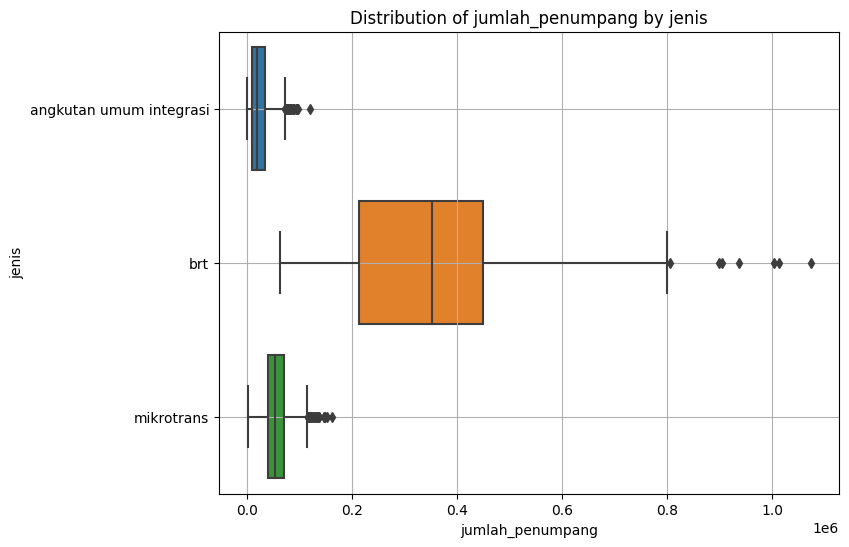

The number of jumlah_penumpang in jenis = angkutan umum integrasi is distributed from 1 - 118725
The number of jumlah_penumpang in jenis = brt is distributed from 62391 - 1073929
The number of jumlah_penumpang in jenis = mikrotrans is distributed from 1473 - 160715


In [53]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='jenis', x='jumlah_penumpang', data=df, orient='h')
plt.grid()
plt.xlabel('jumlah_penumpang')
plt.ylabel('jenis')
plt.title('Distribution of jumlah_penumpang by jenis')
plt.show()

for i in df['jenis'].unique():
    min = df[df['jenis']==i]['jumlah_penumpang'].min()
    max = df[df['jenis']==i]['jumlah_penumpang'].max()

    print(f'The number of jumlah_penumpang in jenis = {i} is distributed from {min} - {max}')

Korelasi secara garis besar dapat dilihat hanya dari jenis dan jumlah penumpang. Hal ini dikarenakan kode_trayek dan trayek merupakan perpanjangan dari variable jenis kendaraan. Dapat diketahui juga bahwa jenis bukan merupakan data yang bersifat ordinal. Sehingga, konversi kategori ke data numerical untuk mendapatkan nilai korelasi dirasa kurang tepat. Maka dari itu, untuk melihat korelasi antara jenis kendaraan dan jumlah penumpang kita dapat melihatnya dengan grafik boxplot.

Dari grafik di atas, didapatkan jenis kendaraan mempengaruhi persebaran jumlah penumpang pada tiap bulannya dengan rincian kasar pesebaran jumlah_penumpang per bulan sebagai berikut:
1. angkutan umum integrasi terpusat antara 15,000 ~ 50,000
2. brt terpusat antara 200,000 ~ 450,000
3. angkutan umum integrasi terpusat antara 50,000 ~ 100,000

## 2. Bagaimana proporsi dan jumlah antar jenis kendaraan berdasarkan trayek yang tersedia?

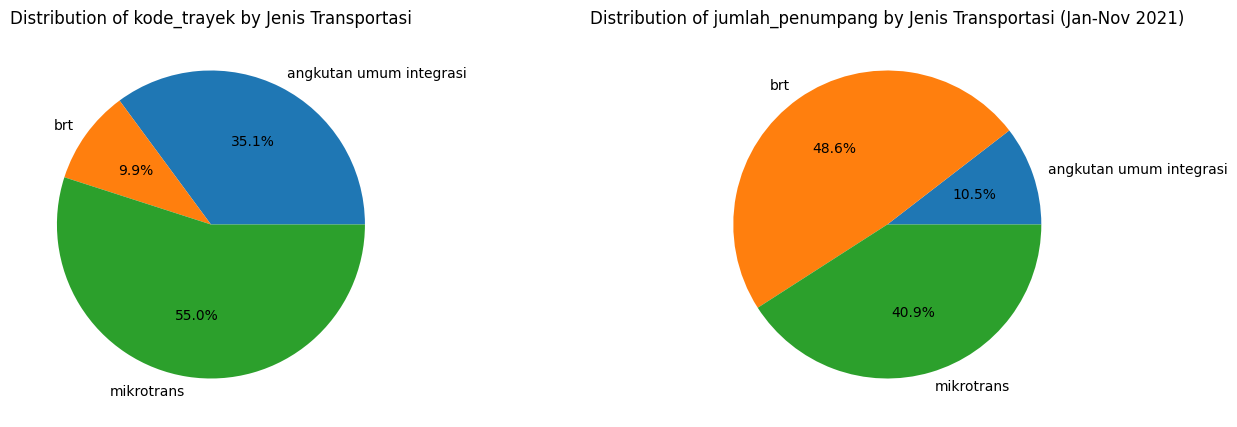

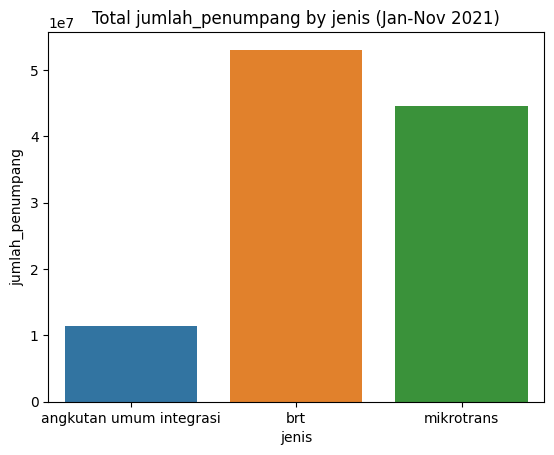

In [54]:
dfTemp = df[['jenis','kode_trayek']].drop_duplicates().groupby('jenis')['kode_trayek'].count().reset_index()

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.pie(
    x= dfTemp['kode_trayek'],
    autopct= '%1.1f%%',
    labels = dfTemp['jenis']
)

plt.title('Distribution of kode_trayek by Jenis Transportasi')


dfTemp = df.groupby('jenis')['jumlah_penumpang'].sum().reset_index()

plt.subplot(1,2,2)
plt.pie(
    data= dfTemp,
    x= 'jumlah_penumpang',
    autopct= '%1.1f%%',
    labels = 'jenis'
)

plt.title('Distribution of jumlah_penumpang by Jenis Transportasi (Jan-Nov 2021)')

plt.show()

plt.figure()
sns.barplot(
    data = df,
    x='jenis',
    y='jumlah_penumpang',
    errorbar=('ci', 0),
    estimator= 'sum'
)

plt.title('Total jumlah_penumpang by jenis (Jan-Nov 2021)')

plt.show()



Dari grafik di atas dapat disimpulkan sebagai berikut:
- Jenis kendaraan berdasarkan kode_trayeknya memang didominasi setengahnya oleh jenis mikrotrans (55%) diikuti dengan angkutan umum integrasi (35.1%) kemudian brt (9.9%).
- Keragaman dari kode_trayek kurang menggambarkan jumlah_penumpang yang menggunakan jenis tranportasi tersebut.
- Jumlah Penumpang pada jenis transportasi brt mendominasi sebesar 48.6% diikuti dengan mikrotrans (40.9%) dan angkutan umum integrasi (10.5%)

Pada bagian ini akan dicari nilai average untuk masing-masing kode_trayek untuk merepresentasikan intensitas penumpang per kode_trayek per bulannya.

In [55]:
dfAvg = df.groupby(['jenis','kode_trayek'])['jumlah_penumpang'].median().reset_index()
dfAvg.rename(columns={'jumlah_penumpang': 'AVG_jumlah_penumpang'}, inplace=True)
display(dfAvg)

,jenis,kode_trayek,AVG_jumlah_penumpang
0,angkutan umum integrasi,10K,32798.0
1,angkutan umum integrasi,11D,51102.0
2,angkutan umum integrasi,11Q,9781.0
3,angkutan umum integrasi,12A,1463.0
4,angkutan umum integrasi,12B,9408.0
...,...,...,...
126,mikrotrans,JAK.77,62948.0
127,mikrotrans,JAK.80,61883.0
128,mikrotrans,JAK.84,40086.0
129,mikrotrans,JAK.85,26835.0


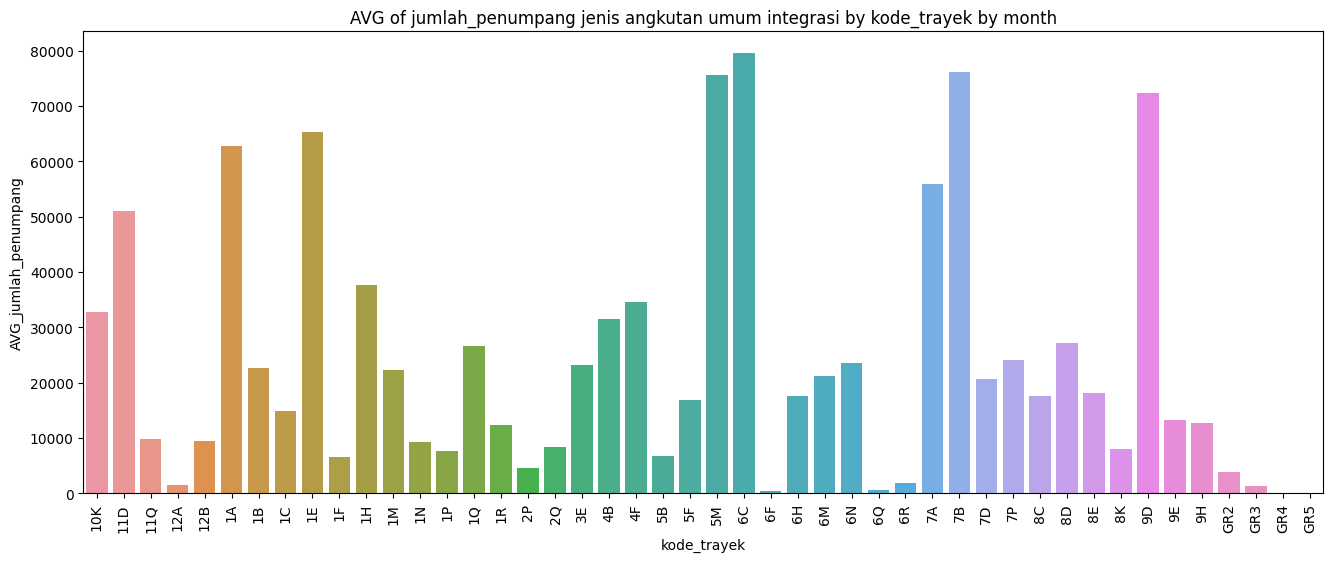

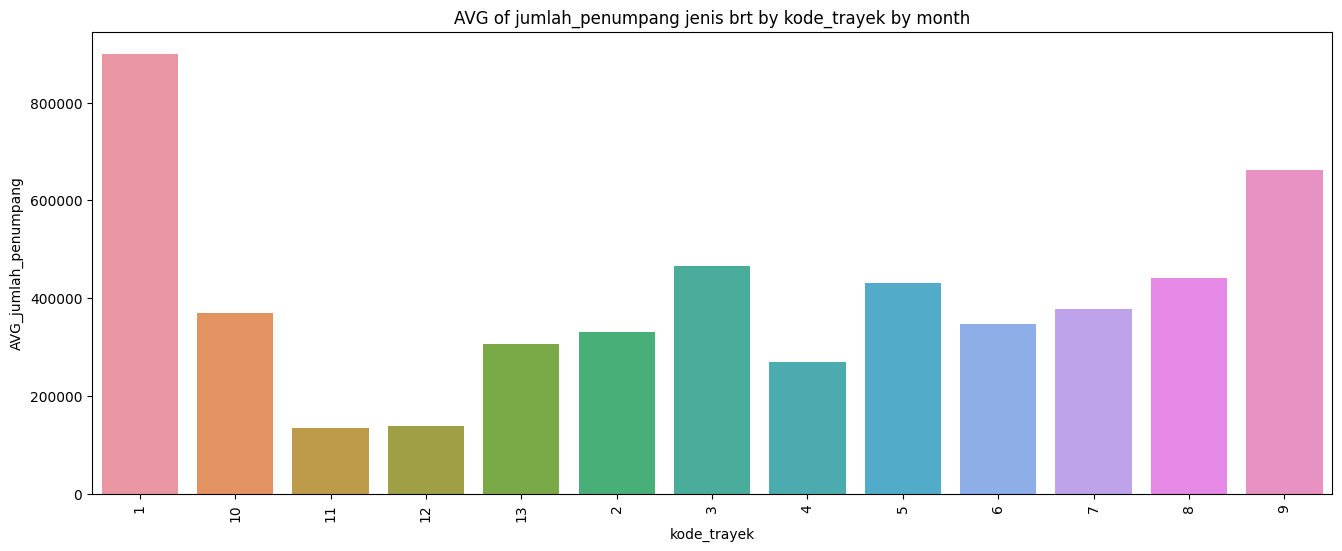

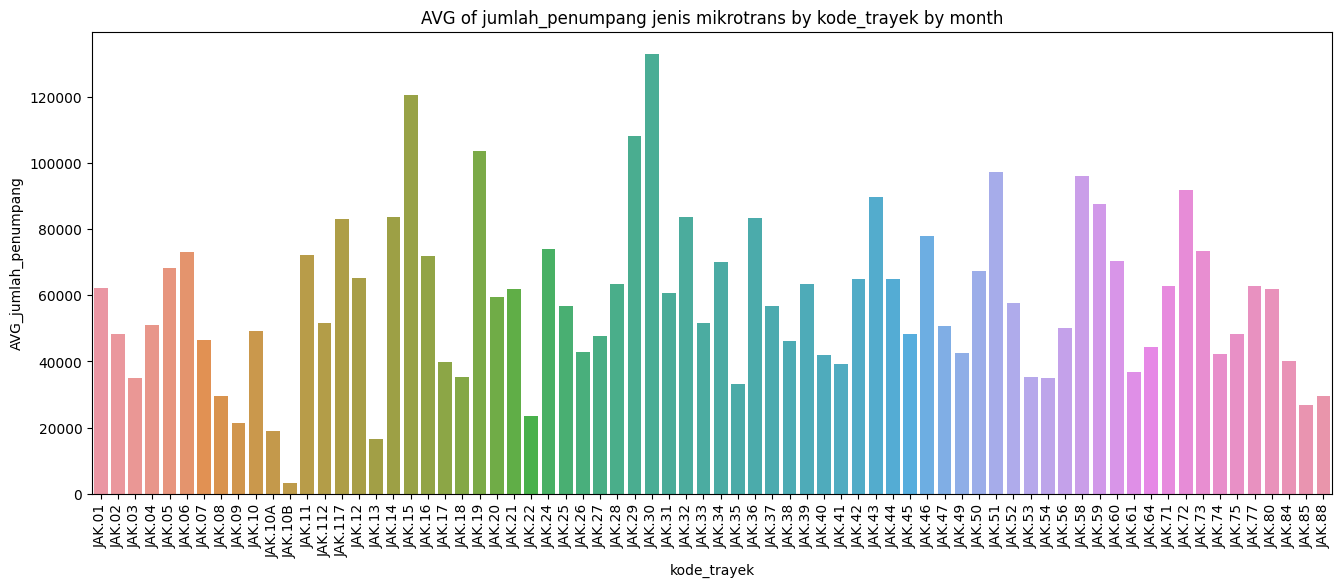

In [56]:
for i in dfAvg['jenis'].unique():
    plt.figure(figsize=(16,6))
    sns.barplot(
        data = dfAvg[dfAvg['jenis']==i], 
        x= 'kode_trayek',
        y='AVG_jumlah_penumpang',
        errorbar=('ci', 0),
        estimator= 'median'
    )

    plt.xticks(
        rotation=90
    )

    plt.title(f'AVG of jumlah_penumpang jenis {i} by kode_trayek by month')

    plt.show()

Dari grafik di atas dapat disimpulkan pembentuk jumlah penumpang pada tiap jenis kendaraan dapat dipengaruhi oleh kode_trayeknya.

## 3. Bagaimana cara pembagian kelas dapat dilakukan berdasrkan variable data yang berpengaruh?

Dari pembahasan di atas, jumlah penumpang merupakan variable yang penting dalam melakukan pembentukan kelas. Jika dibandingkan dengan keterkaitannya atas variable lainnya, jenis kendaraan merupakan variable yang berpengaruh dalam pembentukan jumlah penumpang. Kemudian kode_trayek juga menjadi variable yang berpengaruh untuk membentuk jumlah_penumpang pada tiap-tiap jenis kendaraan.

Sehingga, pembentukan kelas dapat disarankan dengan cara mengacu ke variable jenis dan kode trayek dengan ketentuan berikut:

1. Kelas akan dibagi pada tiap jenis kendaraan.
2. Tiap jenis kendaraan akan dibagi menjadi 3 sub-kelas berdasarkan average jumlah penumpangnya. (High-Med-Low)

---

Jenis (kelas) tidak akan dibuat variable baru, karena jenis sudah memiliki variable sendiri. Sehingga, dibutuhkan variable baru untuk menampung nilai dari sub-kelas.

In [57]:
df_dict = {jenis: dfAvg[dfAvg['jenis'] == jenis].copy() for jenis in dfAvg['jenis'].unique()}

for i in dfAvg['jenis'].unique():
    df_dict[i]['sub_class'] = pd.qcut(df_dict[i]['AVG_jumlah_penumpang'], q=3, labels=['low', 'med', 'high'])

In [58]:
df_dict = {jenis: dfAvg[dfAvg['jenis'] == jenis].copy() for jenis in dfAvg['jenis'].unique()}

for jenis, data in df_dict.items():
    data['crowd_class'] = pd.qcut(data['AVG_jumlah_penumpang'], q=3, labels=['low', 'med', 'high'])

# dfAvg[dfAvg['jenis']=='brt']['AVG_jumlah_penumpang'].quantile(0.6666666)
# df_dict['brt'].sort_values('AVG_jumlah_penumpang')

dfAvg = pd.concat(df_dict.values(), ignore_index=True)

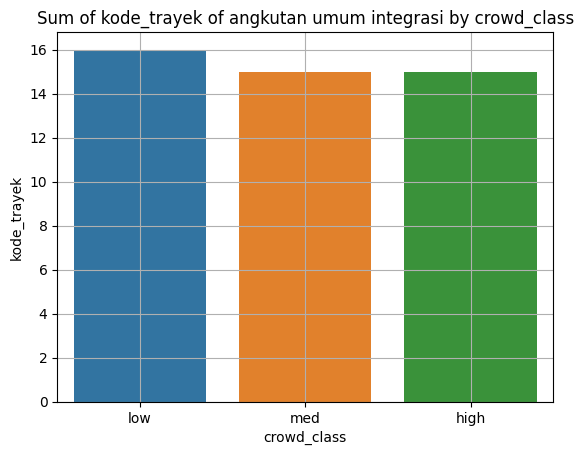

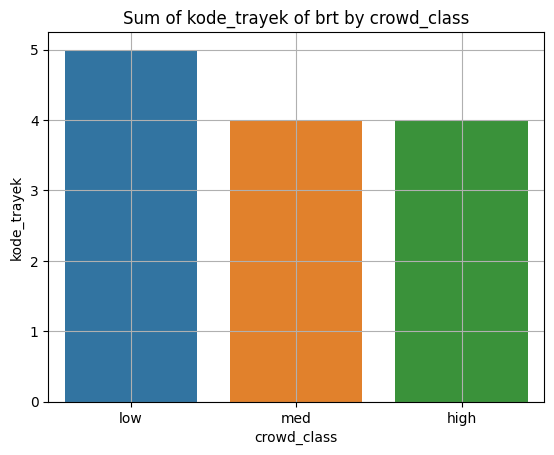

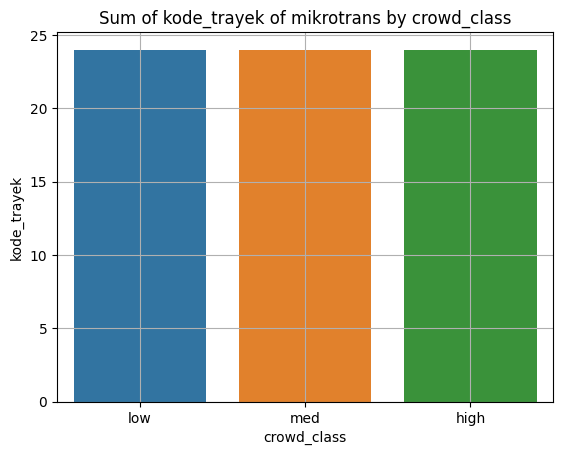

In [59]:
for i in dfAvg['jenis'].unique():
    plt.figure()

    sns.barplot(
        data = dfAvg[dfAvg['jenis']==i].groupby('crowd_class')['kode_trayek'].count().reset_index(),
        x='crowd_class',
        y='kode_trayek'
    )

    plt.grid()
    plt.title(f'Sum of kode_trayek of {i} by crowd_class')
    plt.show()

In [60]:
dfFinal = dfAvg.groupby(['jenis','crowd_class'])['kode_trayek'].count().reset_index()
dfFinal

,jenis,crowd_class,kode_trayek
0,angkutan umum integrasi,low,16
1,angkutan umum integrasi,med,15
2,angkutan umum integrasi,high,15
3,brt,low,5
4,brt,med,4
5,brt,high,4
6,mikrotrans,low,24
7,mikrotrans,med,24
8,mikrotrans,high,24


Dari data tabular dan grafik di atas dapat disimpulkan bahwa setiap sub-kelas (crowd_class) sudah terbagi rata berdasrkan nilai kuartil dari setiap kelasnya (jenis).

In [61]:
pd.set_option('display.max_colwidth', 1000)
listField = []
for i in dfAvg['jenis'].unique() :
    for j in dfAvg[dfAvg['jenis']==i]['crowd_class'].unique():
        listField.append( [i, j,dfAvg[(dfAvg['jenis']==i)&(dfAvg['crowd_class']==j)]['kode_trayek'].nunique(), dfAvg[(dfAvg['jenis']==i)&(dfAvg['crowd_class']==j)]['kode_trayek'].unique()])
listField

tabelFinal = pd.DataFrame(columns=['class','sub_class', 'number of kode_trayek', 'kode_trayek'],
                     data=listField)

cat_order = pd.CategoricalDtype(['low', 'med', 'high'], ordered=True)
tabelFinal['sub_class'] = tabelFinal['sub_class'].astype(cat_order)

tabelFinal.sort_values(['class','sub_class'],inplace=True)
tabelFinal.reset_index(drop=True, inplace=True)

tabelFinal

,class,sub_class,number of kode_trayek,kode_trayek
0,angkutan umum integrasi,low,16,"[12A, 12B, 1F, 1N, 1P, 2P, 2Q, 5B, 6F, 6Q, 6R, 8K, GR2, GR3, GR4, GR5]"
1,angkutan umum integrasi,med,15,"[11Q, 1B, 1C, 1M, 1R, 3E, 5F, 6H, 6M, 6N, 7D, 8C, 8E, 9E, 9H]"
2,angkutan umum integrasi,high,15,"[10K, 11D, 1A, 1E, 1H, 1Q, 4B, 4F, 5M, 6C, 7A, 7B, 7P, 8D, 9D]"
3,brt,low,5,"[11, 12, 13, 2, 4]"
4,brt,med,4,"[10, 5, 6, 7]"
5,brt,high,4,"[1, 3, 8, 9]"
6,mikrotrans,low,24,"[JAK.03, JAK.07, JAK.08, JAK.09, JAK.10A, JAK.10B, JAK.13, JAK.17, JAK.18, JAK.22, JAK.26, JAK.35, JAK.38, JAK.40, JAK.41, JAK.49, JAK.53, JAK.54, JAK.61, JAK.64, JAK.74, JAK.84, JAK.85, JAK.88]"
7,mikrotrans,med,24,"[JAK.01, JAK.02, JAK.04, JAK.10, JAK.112, JAK.20, JAK.21, JAK.25, JAK.27, JAK.28, JAK.31, JAK.33, JAK.37, JAK.39, JAK.42, JAK.44, JAK.45, JAK.47, JAK.52, JAK.56, JAK.71, JAK.75, JAK.77, JAK.80]"
8,mikrotrans,high,24,"[JAK.05, JAK.06, JAK.11, JAK.117, JAK.12, JAK.14, JAK.15, JAK.16, JAK.19, JAK.24, JAK.29, JAK.30, JAK.32, JAK.34, JAK.36, JAK.43, JAK.46, JAK.50, JAK.51, JAK.58, JAK.59, JAK.60, JAK.72, JAK.73]"


In [62]:
for j in dfAvg['jenis'].unique():
    labels = []
    for i in dfAvg[dfAvg['jenis']==j]['crowd_class'].unique():
        labels.append(i)

    for i in dfAvg[dfAvg['jenis']==j]['kode_trayek']:
        labels.append(i)

    parents=[]
    for i in labels:
        if str(i) in list(dfAvg[dfAvg['jenis']==j]['kode_trayek'].astype('str')):
            parents.append(dfAvg[dfAvg['kode_trayek']==i]['crowd_class'].iloc[0])
        else:
            parents.append('')

    # Create the Treemap chart
    fig = go.Figure(go.Treemap(
        labels=labels,
        parents=parents,
        hovertemplate='Class: %{parent}<br>Sub-Class: %{label}<extra></extra>'
    ))

    # Set the title
    fig.update_layout(title_text=f'CLASS : {j}')

    # Show the chart
    fig.show()

Dari data tabular di atas dapat ditunjukkan pembagian kelas dan sub-kelasnya untuk kebutuhan awal penentuan pricing pada ruang-ruang iklan di kendaraan yang akan diterapkan berdasarkan data yang dimiliki oleh TransJakarta.

## MORE INSIGHTS

In [63]:
# Cek kelengkapan trayek per bulan
print(f'Jumlah Trayek\t\t\t\t: {df["kode_trayek"].nunique()}')

dfTemp = df.groupby('date')['kode_trayek'].count().reset_index()
dfTemp['miss_input'] = df["kode_trayek"].nunique() - dfTemp['kode_trayek']

print(f'Jumlah Data Trayek tidak ditemukan\t: {dfTemp["miss_input"].sum()}')

display(dfTemp)


Jumlah Trayek				: 131
Jumlah Data Trayek tidak ditemukan	: 91


,date,kode_trayek,miss_input
0,2021-01-01,120,11
1,2021-02-01,119,12
2,2021-03-01,124,7
3,2021-04-01,120,11
4,2021-05-01,125,6
5,2021-06-01,122,9
6,2021-07-01,126,5
7,2021-08-01,122,9
8,2021-09-01,122,9
9,2021-10-01,122,9


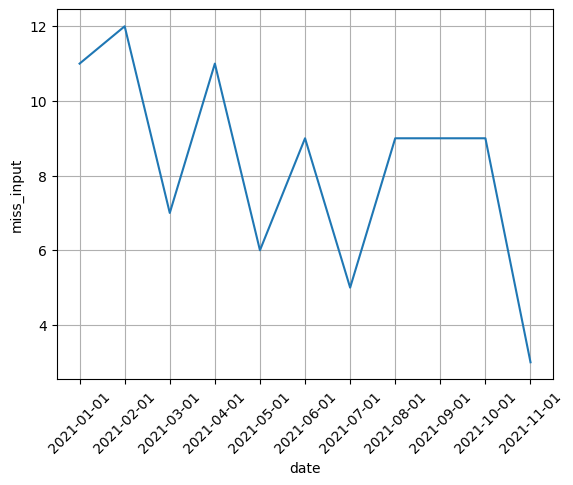

In [64]:
plt.figure()
sns.lineplot(
    data= dfTemp,
    x= 'date',
    y= 'miss_input'
)
plt.grid()

plt.xticks(rotation=45)
plt.show()

# KESIMPULAN DAN REKOMENDASI

Dari hasil analisis di atas dapat disimpulkan sebagai berikut:
1. Terdapat sebuah korelasi antara jenis transportasi dan jumlah penumpang dengan pesebaran data sebagi berikut:
- angkutan umum integrasi memiliki kendaraan yang dapat menampung rentang jumlah penumpang antara 1 - 118,725 per bulannya.
- brt memiliki kendaraan yang dapat menampung rentang jumlah penumpang antara 62,391 - 1,073,929 per bulannya.
- mikrotrans memiliki kendaraan yang dapat menampung rentang jumlah penumpang antara 1,473 - 160,715 per bulannya.
2. Jenis kendaraan berdasarkan kode_trayeknya didominasi setengahnya oleh jenis mikrotrans (55%) diikuti dengan angkutan umum integrasi (35.1%) kemudian brt (9.9%). Tetapi hal ini tidak menggambarkan jumlah penumpang yang menggunakan transportasi tersebut sepanjang periode Januari - November 2021. Jumlah penumpang pada periode tersebut untuk jenis transportasi brt mendominasi sebesar 48.6% diikuti dengan mikrotrans (40.9%) dan angkutan umum integrasi (10.5%).
3. Kode trayek berpengaruh dalam pembentukan jumlah penumpang pada tiap jenis kendaraan.
4. Pembagian kelas dan sub-kelas untuk kebutuhan awal penentuan pricing pada ruang-ruang iklan di kendaraan dapat diterapkan berdasarkan jenis, kode_trayek, dan jumlah_penumpang.
5. Terdapat permasalahan dari kualitas data yang dimiliki oleh TransJakarta sepanjang tahun 2021 sebagai berikut:
- Inkonsistensi penamaan pada variable kode_trayek dan trayek.
- Terdapat data yang tercatat tetapi memiliki jumlah_penumpang = 0.
- Terdapat data yang tidak tercatat lengkap sepanjang periode Januari - November 2021.

---

Dari kesimpulan di atas dapat diberikan rekomendasi kepada pihak TransJakarta sebagai berikut:
1. Penentuan awal kelas dan sub-kelas untuk ruang-ruang pengiklanan pada kendaraan dapat diterapkan berdasarkan jenis, kode_trayek, dan jumlah_penumpang dengan mengacu grafik treemap di bawah. Penentuan kelas dapat ditentukan dengan variable jenis kendaraan dan sub-kelas dapat ditentukan berdasarkan pengelompokkan intensitas jumlah penumpang per bulan pada kode_trayek di masing-masing jenis kendaraan terkait (low-med-high).
2. Untuk mempertajam penentuan kelas dibutuhkan data tambahan lainnya berupa jumlah armada per kode_trayek agar pembagian lebih tepat.
3. Dibutuhkan peninjauan ulang sistem input data penumpang yang telah diterapkan TransJakarta agar data yang diperoleh memiliki kualitas yang lebih tinggi. Beberapa hal yang dapat dilakukan meliputi:
- Memastikan semua sistem sudah terdigitalisasi dan terintegrasi.
- Melakukan pemeriksaan perangkat di dalam ataupun luar kendaraan secara berkala.
4. Dibutuhkan sebuah aplikasi monitoring untuk melakukan pemantauan data secara berkala.

In [66]:
for j in dfAvg['jenis'].unique():
    labels = []
    for i in dfAvg[dfAvg['jenis']==j]['crowd_class'].unique():
        labels.append(i)

    for i in dfAvg[dfAvg['jenis']==j]['kode_trayek']:
        labels.append(i)

    parents=[]
    for i in labels:
        if str(i) in list(dfAvg[dfAvg['jenis']==j]['kode_trayek'].astype('str')):
            parents.append(dfAvg[dfAvg['kode_trayek']==i]['crowd_class'].iloc[0])
        else:
            parents.append('')

    # Create the Treemap chart
    fig = go.Figure(go.Treemap(
        labels=labels,
        parents=parents,
        hovertemplate='Class: %{parent}<br>Sub-Class: %{label}<extra></extra>'
    ))

    # Set the title
    fig.update_layout(title_text=f'CLASS : {j}')

    # Show the chart
    fig.show()

In [67]:
dfAvg.to_csv('TransJakartaAVG.csv', index=False)